<h2>Who wants a piece of Py?</h2>

<h1>WhoPy #001</h1>

<h4>Cześć,<br>To jest spotkanie bardzo wstępne i informacyjne</h4>
<p>A co za tym idzie nie będziemy niczego wielkiego starać się kogokolwiek uczyć, ba! Nawet nie za bardzo jestem przygotowany z prezentacją</p>
<p align=right>...co widać</p>
<hr>
<h2>and now something completly diffrend...</h2>
<h2>...zaangażuj się!</h2>

<h1>Przykład użycia Python'a i biblioteki thermalModuleLibrary</h1>
<p text-align=right>...krok po kroczku</p>

<div style="background-color: #f4df42; padding: 5px;">
<h1>Uwaga!</h1>
<p> Cały ten notatnik można pobrac z HitHuba pod adresem:<br>
<a href='https://github.com/tymancjo/thermalModelLibrary/tree/01.wip'>https://github.com/tymancjo/thermalModelLibrary/tree/01.wip</a> wybierając <i><b>Clone or download</b></i> jak pokazano tutaj:
<img src='img/GitInfo.png'>
<hr>
<h3>Najlepszym sposobem na stworzenie środowiska do uruchomienia tego notatnika jest instalacja Anacondy</h3>
<p>Download instalatorów w zależnosci od systemu operacyjnego można znaleźć na stronie projektu: <a href='https://www.continuum.io/downloads'>https://www.continuum.io/downloads</a> <br>

<p>Jako wstep do użytkowania Jupyter Notebook polecam film na <a href='https://www.youtube.com/watch?v=HW29067qVWk'>YouTube</a></p>

</div>
<br>

<div style="background-color: #a7f442; padding: 5px;">
<h3>If you are running this in jupyter notebook, go to the menu and choose:<br>
<i>Kernel > Restart and Run All</i></h3>
<img src='img/jupyterMenu.png'>
</div>


Na początek załadujemy kilka gotowych bibliotek python'a
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [1]:
import numpy as np  #to taka biblioteka z funkcjami numerycznymi jak tablice i inne takie tam      
import matplotlib.pyplot as plt #to biblioteka pozwalajaca nam wykreslać wykresyb

teraz czas załadować naszą własną bibliotekę<br>
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [2]:
#importing our own library
from thermalModelLibrary import functionsLibrary as tml

<p>czyli z naszego pakietu <i>thermalModelLibrary</i> importujemy <i>functionsLibrary</i> (taki zbiór funkcji wszelakich) jako <i>tml</i> - bo to łatwiej napisac w kodzie niźli pełną nazwę</p>
<h2>Mamy biblioteki - możemy działać</h2>
<br>
<p>Na start zdefiniujmy sobie analizowaną geometrię szyny. Powiedzmy, że coś takiego: szyna 40x10mm długości 250mm z dwoma otworami na początku i na końcu.
<img src='img/simpleCopperBar40x10.png'>
</p>
<p>Zdefiniujmy zatem opis tej geometrii w postaci macierzowej dzieląc ja na <i>segmenty</i>:</p>
<ul>
    <li>segment 40x10,10mm dłogości, bez otworu
    <li>segment 40x10,15mm długości, otwór 14mm
    <li>segment 40x10,200mm długości, bez otworu
    <li>segment 40x10,15mm długości, otwór 14mm
    <li>segment 40x10,10mm dłogości, bez otworu
</ul>

<p> i wykonujemy ten blok <b>Shift+ENTER</b>    

In [3]:
# Definig the bar as segments of geometry
# the formula is for each ssegment
# [[SegmentHeight, SegmentThickness, SegmentLenght, CutoutHeight]]
# Cutout is assumed to be along entire segment lenght

copperBarGeometry = np.array([\
                              [40,10,10,0],\
                              [40,10,15,14],\
                              [40,10,200,0],\
                              [40,10,15,14],\
                              [40,10,10,0],\
                              ])
# end of Bar geometry definition

<p> zdefiniowaliśmy kształt, teraz możemy sptrawdzić jak nam poszło. W tym celu wywołamy jedna z funkcji z naszej zaimportowanej biblioteki <i>tml</i> a konkretnie funkcję <i>drawCuShape(macieżGeomertii,Czy są przyłacza LAB,Nazwa Obrazu)</i> z parametrami jak w opisie, wykonując ten blok <b>Shift+ENTER</b>

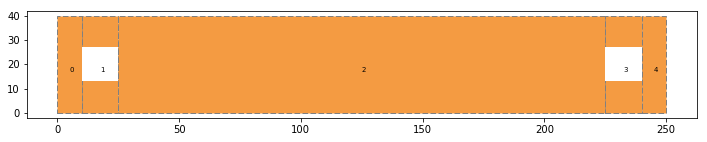

In [4]:
tml.drawCuShape(copperBarGeometry,False,'szyna') #Funkcja przygotowuje grafikę do wyświetlenia
plt.show() #Polecenie wyświetlenia grafiki - pochodzi z zaimportowanej biblioteki matplotlib.pyplot

<h2>Mamy już co analilzować</h2>
<p>Pora zatem wykonać pierwszą próbną analizę</p>
<p>Dla uproszczenia, nie będę tutaj wchodził w szczegółowy opis głównej funkcji analizy termicznej. Myślę jendak, że sama definicja parametrów daje duże wskazówki o czym mowa.</p>
<p>Jendak dla porządku, warto przytoczyć, że funkcja <i>mainAnalysis(...)</i> biblioteki <i>tml</i> pracuje w oparciu o kilka podstawowych danych wejściowych:</p>
<ul>
    <li>wektor kroków czasowych dla analizy
    <li>wektor wartości prądu dla kroków czasoeych analizy (to pozwla zadawać zmienny przebieg pradu podczas symulacji)
    <li>temperaturę początkową szyny (zakładana jest taka sama dla wszytskich segmentów)
    <li>temperaturę otoczenia
    <li>parametry materiałowe i nazwę
 </ul>
 <p> zdefiniujmy zatem nasza analizę i uruchomimy ją <b>Shift+ENTER</b>

In [5]:
ResultsData = tml.mainAnalysis(analysisName='First Study',\
                               geometryArray=copperBarGeometry,\
                               timeArray=np.arange(0, 10000, 1),\
                               currentArray=np.zeros(9980*2),\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=20, barStartTemperature=250,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385) 

Starting analysis: First Study
Progress: |██████████████████████████████████████████████████| 100.0% Complete


<p>Powyższy pasek postępu pokazuje postęp analizy. 
W jej rezultacie w zmiennej macierzowej <i><b>ResultData</b></i> zapisane zostają nasze wyniki - czyli temperatury w poszczególnych segmentach geometrii jako funkcja czasu.</p>
<p>Możemy teraz wykreślić nasze wyniki</p>
<p>wykorzytsamy przygotowaną funkcję <i>plotCurves(...)</i> naszej biblioteki <i>tml</i> wpisując poniższy kod i uruchomimy ją <b>Shift+ENTER</b></p>

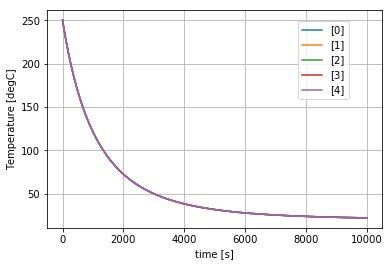

In [6]:
tml.plotCurves(timeTable=np.arange(0, 10000, 1),\
               dataArray=ResultsData,\
               plotName='HTC=25.e=0.2',xLabel='time [s]',yLabel='Temperature [degC]',\
               curvesLabelArray = ['0','1','2','3','4'])

plt.show()

<p>W wyniku analizy mamy przebieg chłodzenia naszej szyny dla przyjętych parametrów emisyjności i współczynnika wnikania ciepła od temperatury poczatkowej do temperatury otoczenia</p>
<p>Jendak nic nie stoi na przeszkodzie, żeby teraz przeanalizować nagrzewanie tejże szyny pradem 1000A przez powiedzmy także 10000s w temperaturze otoczenia 25C (i takiej temperaturze startowej)</p>
<p>zdefiniujmy taka analizę i uruchomimy ją <b>Shift+ENTER</b>. Tym razem jednak od razu zadamy także wykreślanie wyników:</p>

Starting analysis: Second Study
Progress: |██████████████████████████████████████████████████| 100.0% Complete


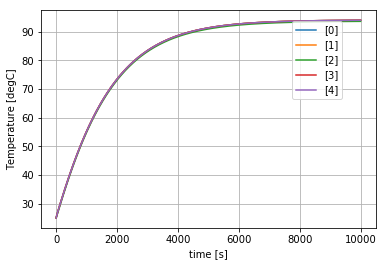

In [7]:
time = np.arange(0, 10000, 1) # Zdefiniujmy sobie wektor czasu
current = 1000 * np.ones(time.size) # Definiujemy wektor prądu na 1000A * wektor jednostkowy o długości takiej jak time

ResultsData = tml.mainAnalysis(analysisName='Second Study',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385)

tml.plotCurves(timeTable=time,\
               dataArray=ResultsData,\
               plotName='HTC=25.e=0.2',xLabel='time [s]',yLabel='Temperature [degC]',\
               curvesLabelArray = ['0','1','2','3','4'])

plt.show()

<p>Co logiczne otrzymaliśmy inne wyniki.<p>
<p>I jako ciekawostkę popatrzmy na nagrzewanie tej szyny przez 3s prądem 25kA i późniejsze jej schładzanie.
popatrzmy na piersze 60s.
<p>

<p>zdefiniujmy taka analizę i uruchomimy ją <b>Shift+ENTER</b>.</p>

Starting analysis: Second Study
Progress: |██████████████████████████████████████████████████| 100.0% Complete


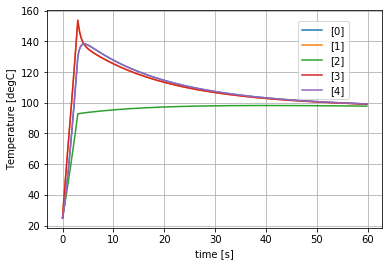

In [8]:
time = np.arange(0, 60, 0.2) # Zdefiniujmy sobie wektor czasu

#Zdefiniujmy funkcję opisująca prąd w czasie
def Icw(czas, czasMax, iRMS):
    if czas <= czasMax:
        return iRMS
    else:
        return 0
    
#Zwektoryzujmy nasza funkcję opisująca prąd (zapiszmy jako wektor)
Icw_vector = np.vectorize(Icw)
current = Icw_vector(time,3,25e3)


ResultsData = tml.mainAnalysis(analysisName='Second Study',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385)

tml.plotCurves(timeTable=time,\
               dataArray=ResultsData,\
               plotName='HTC=25.e=0.2',xLabel='time [s]',yLabel='Temperature [degC]',\
               curvesLabelArray = ['0','1','2','3','4'])

plt.show()

<p>a teraz popatrzmy na powiedzmy godzinę po takim 3s zwarciu</p>
<p> Pamiętaj <b>Shift+ENTER</b>.</p>

Starting analysis: Second Study
Progress: |██████████████████████████████████████████████████| 100.0% Complete


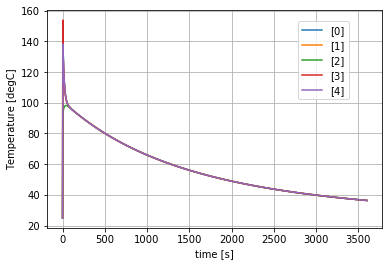

In [9]:
time = np.arange(0, 60*60, 0.2) # Zdefiniujmy sobie wektor czasu

#Zdefiniujmy funkcję opisująca prąd w czasie
def Icw(czas, czasMax, iRMS):
    if czas <= czasMax:
        return iRMS
    else:
        return 0
    
#Zwektoryzujmy nasza funkcję opisująca prąd (zapiszmy jako wektor)
Icw_vector = np.vectorize(Icw)
current = Icw_vector(time,3,25e3)


ResultsData = tml.mainAnalysis(analysisName='Second Study',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385)

tml.plotCurves(timeTable=time,\
               dataArray=ResultsData,\
               plotName='HTC=25.e=0.2',xLabel='time [s]',yLabel='Temperature [degC]',\
               curvesLabelArray = ['0','1','2','3','4'])

plt.show()

<h3>I to na tyle w kwestii swoistego podsumowania pierwszego naszego spotkania</h3>
<h3>Miłej zabawy!</h3>
<p>Tomek</p>